In [16]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional visual style for all plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)  # Use a slightly wider format for comparisons

print("Setup Complete. Libraries loaded.")

Setup Complete. Libraries loaded.


In [17]:
# Define the path to our results artifact
results_path = os.path.join("..", "results", "model_performance.csv")

# Load the data
try:
    df_results = pd.read_csv(results_path)
    print(f"Successfully loaded results artifact with shape: {df_results.shape}")
except FileNotFoundError:
    print(f"ERROR: File not found at {results_path}")
    assert False, "Please run the main pipeline script first."

# --- Validate the structure ---
print("\n--- First 5 Rows of Results ---")
display(df_results.head())

print(f"\nUnique Datasets: {df_results['dataset'].unique().tolist()}")
print(f"Unique Models:   {df_results['model'].unique().tolist()}")
print(
    f"Number of Runs per Combination: \n{df_results.groupby(['dataset', 'model']).size().unstack()}"
)

Successfully loaded results artifact with shape: (90, 8)

--- First 5 Rows of Results ---


,dataset,model,run_id,accuracy,precision,recall,f1,roc_auc
0,baseline,LogisticRegression,1,0.731278,0.735000,0.948387,0.828169,0.596192
1,baseline,LogisticRegression,2,0.775330,0.765306,0.967742,0.854701,0.700806
2,baseline,LogisticRegression,3,0.740088,0.737624,0.961290,0.834734,0.631541
3,baseline,LogisticRegression,4,0.740088,0.733010,0.974194,0.836565,0.625896
4,baseline,LogisticRegression,5,0.726872,0.738462,0.929032,0.822857,0.640054



Unique Datasets: ['baseline', 'ratio', 'threshold']
Unique Models:   ['LogisticRegression', 'KNN', 'RandomForest']
Number of Runs per Combination: 
model      KNN  LogisticRegression  RandomForest
dataset                                         
baseline    10                  10            10
ratio       10                  10            10
threshold   10                  10            10


In [18]:
# Group by dataset and model, then calculate the mean and standard deviation for key metrics
summary_stats = df_results.groupby(["dataset", "model"]).agg(
    {
        "recall": ["mean", "std"],
        "f1": ["mean", "std"],
        "accuracy": ["mean", "std"],
        "precision": ["mean", "std"],
        "roc_auc": ["mean", "std"],
    }
)

# Format the table for better readability
summary_stats = summary_stats.round(4)  # Round to 4 decimal places

print("--- Aggregated Performance Metrics (Mean ± Std. Dev. over 10 runs) ---")
display(summary_stats)

--- Aggregated Performance Metrics (Mean ± Std. Dev. over 10 runs) ---


recall              f1         accuracy          \
                                mean     std    mean     std     mean     std   
dataset   model                                                                 
baseline  KNN                 0.8852  0.0233  0.8183  0.0093   0.7317  0.0105   
          LogisticRegression  0.9574  0.0162  0.8335  0.0091   0.7388  0.0141   
          RandomForest        0.9381  0.0200  0.8407  0.0119   0.7573  0.0173   
ratio     KNN                 0.8955  0.0235  0.8217  0.0103   0.7348  0.0128   
          LogisticRegression  0.9574  0.0122  0.8346  0.0079   0.7410  0.0124   
          RandomForest        0.9400  0.0215  0.8388  0.0102   0.7533  0.0151   
threshold KNN                 0.8981  0.0272  0.8251  0.0163   0.7401  0.0234   
          LogisticRegression  0.9581  0.0140  0.8366  0.0080   0.7445  0.0125   
          RandomForest        0.9400  0.0175  0.8422  0.0117   0.7595  0.0179   

                             precision         roc_auc          
                                  mean     std    mean     std  
dataset   model                                                 
baseline  KNN                   0.7610  0.0061  0.6740  0.0249  
          LogisticRegression    0.7380  0.0100  0.6301  0.0328  
          RandomForest          0.7617  0.0111  0.6642  0.0400  
ratio     KNN                   0.7594  0.0080  0.6884  0.0275  
          LogisticRegression    0.7398  0.0082  0.6348  0.0335  
          RandomForest          0.7575  0.0125  0.6713  0.0405  
threshold KNN                   0.7633  0.0158  0.6695  0.0312  
          LogisticRegression    0.7426  0.0089  0.6321  0.0361  
          RandomForest          0.7630  0.0130  0.6625  0.0357

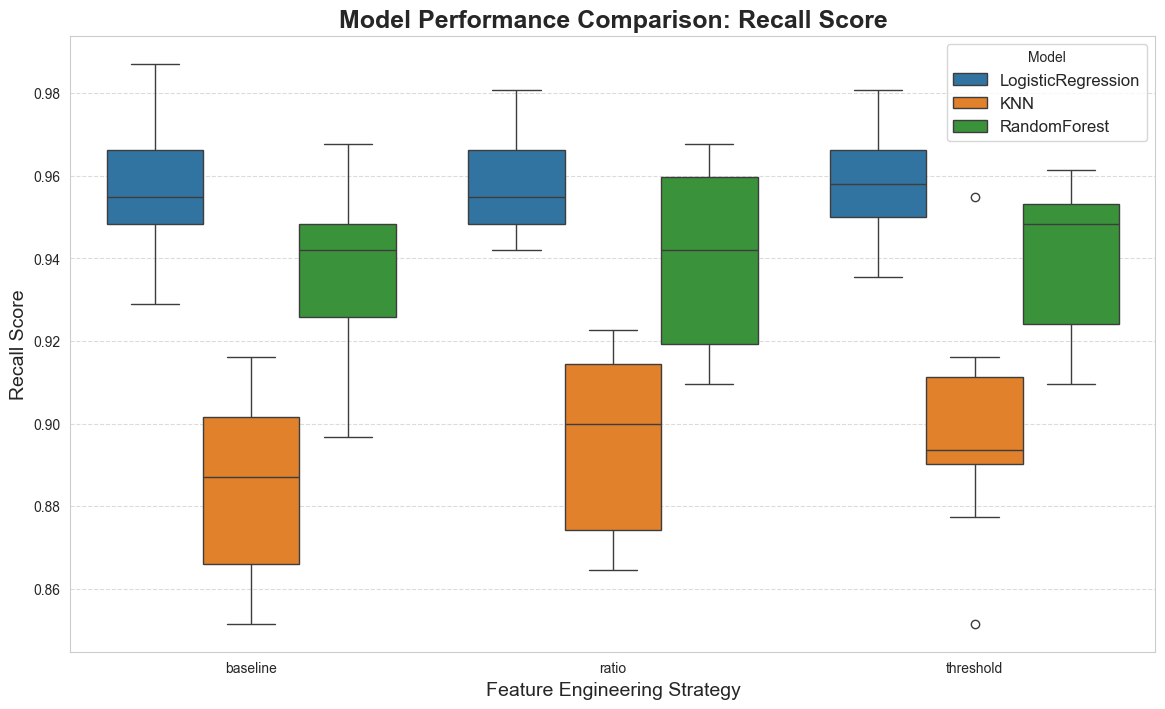

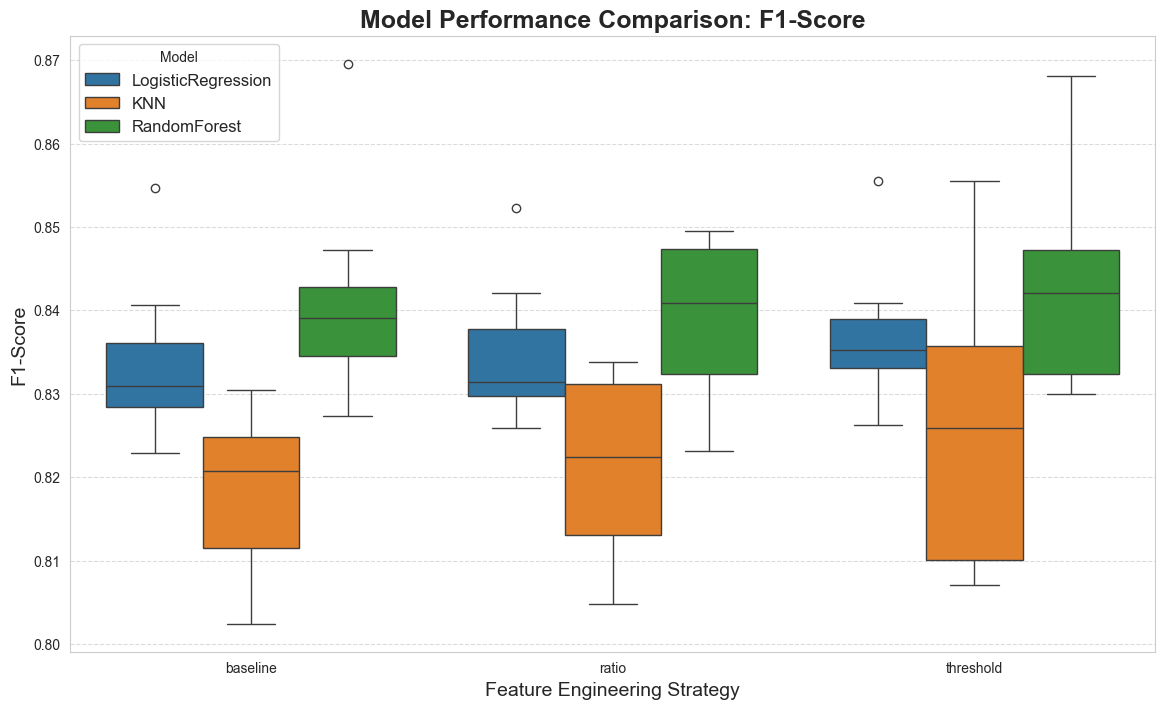

In [19]:
# --- Visualization 1: Recall Comparison ---
plt.figure()
sns.boxplot(
    data=df_results,
    x="dataset",
    y="recall",
    hue="model",
    order=["baseline", "ratio", "threshold"],
)  # Enforce a logical order
plt.title("Model Performance Comparison: Recall Score", fontsize=18, weight="bold")
plt.xlabel("Feature Engineering Strategy", fontsize=14)
plt.ylabel("Recall Score", fontsize=14)
plt.legend(title="Model", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- Visualization 2: F1-Score Comparison ---
plt.figure()
sns.boxplot(
    data=df_results,
    x="dataset",
    y="f1",
    hue="model",
    order=["baseline", "ratio", "threshold"],
)  # Enforce a logical order
plt.title("Model Performance Comparison: F1-Score", fontsize=18, weight="bold")
plt.xlabel("Feature Engineering Strategy", fontsize=14)
plt.ylabel("F1-Score", fontsize=14)
plt.legend(title="Model", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [20]:
# Find the single best combination based on the mean recall
best_combination = summary_stats["recall"]["mean"].idxmax()
best_performance = summary_stats.loc[best_combination]

print("--- Conclusion ---")
print(
    f"The best performing combination based on mean recall is: {best_combination[1]} on the '{best_combination[0]}' dataset."
)
print("\nPerformance of the winning model:")
print(best_performance)

print("\n--- Key Theses Supported by the Data ---")
print("1. Which model architecture is superior?")
# Add your interpretation here, e.g., "RandomForest consistently outperforms LR and KNN..."
print("\n2. What is the impact of adding clinically-informed ratios (NLR/PLR)?")
# Add your interpretation here, e.g., "The 'ratio' dataset provides a marginal but consistent improvement..."
print("\n3. What is the impact of replacing platelet count with a binary threshold?")
# Add your interpretation here, e.g., "The 'threshold' dataset performs comparably or slightly worse than baseline, suggesting..."

--- Conclusion ---
The best performing combination based on mean recall is: LogisticRegression on the 'threshold' dataset.

Performance of the winning model:
recall     mean    0.9581
           std     0.0140
f1         mean    0.8366
           std     0.0080
accuracy   mean    0.7445
           std     0.0125
precision  mean    0.7426
           std     0.0089
roc_auc    mean    0.6321
           std     0.0361
Name: (threshold, LogisticRegression), dtype: float64

--- Key Theses Supported by the Data ---
1. Which model architecture is superior?

2. What is the impact of adding clinically-informed ratios (NLR/PLR)?

3. What is the impact of replacing platelet count with a binary threshold?
